We will be using the starter dataset on kaggle available (https://www.kaggle.com/c/titanic/data)


In [290]:
#Importing the basic libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn import preprocessing

In [291]:
### Importing data 
train = pd.read_csv('../data/titanic/train.csv')
test = pd.read_csv('../data/titanic/test.csv')
ty = pd.read_csv('../data/titanic/gender_submission.csv')
test = pd.merge(test, ty, on='PassengerId')

df = pd.concat([train, test], sort=True)

df = df[['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Survived']]

df.isnull().sum()

Age         263
Embarked      2
Fare          1
Parch         0
Pclass        0
Sex           0
SibSp         0
Survived      0
dtype: int64

In [292]:
# the next step would be finding any missing data

# We can see that around 177 rows have missing age value, the number of rows are significant we 
# cannot remove them so we find the mean and assign it to the age - This is a bad idea and will be rectified
# in the further stages
df['Age'].fillna(df['Age'].mean(), inplace=True)
# a better approach for filling na would be to create another model which can predict the age based on 
# other parameters

# Removing the embarked which have value NA
df.dropna(inplace=True)

print('Missing values \n',df.isnull().sum())

df.head()

Missing values 
 Age         0
Embarked    0
Fare        0
Parch       0
Pclass      0
Sex         0
SibSp       0
Survived    0
dtype: int64


,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,0,3,male,1,0
1,38.0,C,71.2833,0,1,female,1,1
2,26.0,S,7.9250,0,3,female,0,1
3,35.0,S,53.1000,0,1,female,1,1
4,35.0,S,8.0500,0,3,male,0,0


In [293]:
# Convert categorical values
print(df['Sex'].value_counts())
print(df['Embarked'].value_counts())

# df = pd.get_dummies(df, columns=['Sex', 'Embarked']).head()


male      842
female    464
Name: Sex, dtype: int64
S    913
C    270
Q    123
Name: Embarked, dtype: int64


In [294]:
cols = {'Sex': {'male':0, 'female': 1}, 'Embarked': {'S':1, 'C':2,'Q':3}}
df.replace(cols, inplace=True)

In [295]:
from sklearn.model_selection import train_test_split
X = df[['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']]
y = df[['Survived']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

X_train.head()

Train set: (1044, 7) (1044, 1)
Test set: (262, 7) (262, 1)


,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
162,26.0,1,7.7750,0,3,0,0
172,23.0,1,13.9000,0,3,0,1
575,19.0,1,14.5000,0,3,0,0
405,34.0,1,21.0000,0,2,0,1
310,24.0,2,83.1583,0,1,1,0


In [296]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='liblinear').fit(X_train, y_train)
clf

/home/krishna/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [298]:
yhat = clf.predict(X_test)

In [299]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.8587786259541985

In [300]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 70  19]
 [ 18 155]]


Confusion matrix, without normalization
[[ 70  19]
 [ 18 155]]


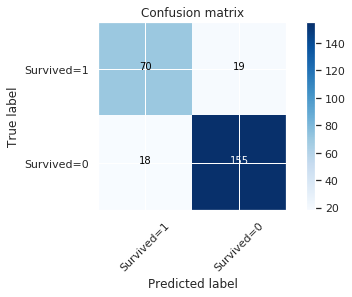

In [302]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survived=1','Survived=0'],normalize= False,  title='Confusion matrix')

In [303]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.89      0.90      0.89       173
           1       0.80      0.79      0.79        89

   micro avg       0.86      0.86      0.86       262
   macro avg       0.84      0.84      0.84       262
weighted avg       0.86      0.86      0.86       262

